# Проект №1 по курсу "Анализ данных в индустрии" от Тинькофф.Образование

### Ход работы

#### Импортируем необходимые библиотеки

In [38]:
import pandas as pd
import psycopg2 as ps
import matplotlib.pyplot as plt

#### Подключаемся к БД и вводим в переменную df данные таблицы msu_analytics.client

In [3]:
conn = ps.connect(host = "158.160.52.106", port = 5432, database="postgres", user="student", password="JvLda93aA")
df = pd.read_sql("SELECT distinct * FROM msu_analytics.client", con=conn)

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


#### Определяем количество людей, посетивших сайт сервиса (по месяцам).

In [4]:
sql1_month = """SELECT count(client_rk) as visit, date_trunc('month', visit_dttm) 
FROM msu_analytics.client
group by date_trunc
order by date_trunc"""
data_visit_month = pd.read_sql(sql1_month, con=conn)
data_visit_month.index = data_visit_month['date_trunc']
data_visit_month

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,visit,date_trunc
date_trunc,,
2022-09-01,778,2022-09-01
2022-10-01,843,2022-10-01
2022-11-01,786,2022-11-01
2022-12-01,805,2022-12-01
2023-01-01,852,2023-01-01
2023-02-01,32,2023-02-01


#### Точно также определяем количество людей, посетивших сайт сервиса (по неделям).

In [5]:
sql1_week = """SELECT count(client_rk) as visit, date_trunc('week', visit_dttm) 
FROM msu_analytics.client
group by date_trunc
order by date_trunc"""
data_visit_week = pd.read_sql(sql1_week, con=conn)
data_visit_week.index = data_visit_week['date_trunc']
data_visit_week

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,visit,date_trunc
date_trunc,,
2022-08-29,111,2022-08-29
2022-09-05,184,2022-09-05
2022-09-12,167,2022-09-12
2022-09-19,181,2022-09-19
2022-09-26,195,2022-09-26
2022-10-03,204,2022-10-03
2022-10-10,190,2022-10-10
2022-10-17,171,2022-10-17
2022-10-24,189,2022-10-24


#### Определим количество зарегистрировавшихся людей, посетивших сайт (по месяцам и неделям).

In [6]:
sql2_month = """SELECT count(client_rk) as registration, date_trunc('month', visit_dttm) 
FROM msu_analytics.client
left join msu_analytics.account using(client_rk)
where account_rk is not null
group by date_trunc
order by date_trunc"""
data_registr_month = pd.read_sql(sql2_month, con=conn)
data_registr_month.index = data_registr_month['date_trunc']
data_registr_month

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,registration,date_trunc
date_trunc,,
2022-09-01,190,2022-09-01
2022-10-01,217,2022-10-01
2022-11-01,200,2022-11-01
2022-12-01,196,2022-12-01
2023-01-01,213,2023-01-01
2023-02-01,8,2023-02-01


In [7]:
sql2_week = """SELECT count(client_rk) as registration, date_trunc('week', visit_dttm) 
FROM msu_analytics.client
left join msu_analytics.account using(client_rk)
where account_rk is not null
group by date_trunc
order by date_trunc"""
data_registr_week = pd.read_sql(sql2_week, con=conn)
data_registr_week.index = data_registr_week['date_trunc']
data_registr_week

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,registration,date_trunc
date_trunc,,
2022-08-29,32,2022-08-29
2022-09-05,31,2022-09-05
2022-09-12,43,2022-09-12
2022-09-19,45,2022-09-19
2022-09-26,59,2022-09-26
2022-10-03,58,2022-10-03
2022-10-10,44,2022-10-10
2022-10-17,41,2022-10-17
2022-10-24,48,2022-10-24


#### Далее определим количество зарегистрированных пользователей, заполнивших заявки на участие в квестах.

In [8]:
sql3_month = """SELECT client_rk, date_trunc('month', visit_dttm) 
FROM msu_analytics.client
left join msu_analytics.account using(client_rk)
left join msu_analytics.application using(account_rk)
where application_rk is not null"""
data_appl_month = pd.read_sql(sql3_month, con=conn)
data_appl_month = data_appl_month.drop_duplicates().sort_values(by='date_trunc', ignore_index=True).groupby('date_trunc').count()
data_appl_month

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,client_rk
date_trunc,
2022-09-01,51
2022-10-01,65
2022-11-01,56
2022-12-01,57
2023-01-01,64


In [9]:
sql3_week = """SELECT client_rk, date_trunc('week', visit_dttm) 
FROM msu_analytics.client
left join msu_analytics.account using(client_rk)
left join msu_analytics.application using(account_rk)
where application_rk is not null"""
data_appl_week = pd.read_sql(sql3_week, con=conn)
data_appl_week = data_appl_week.drop_duplicates().sort_values(by='date_trunc', ignore_index=True).groupby('date_trunc').count()
data_appl_week

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,client_rk
date_trunc,
2022-08-29,7
2022-09-05,6
2022-09-12,16
2022-09-19,12
2022-09-26,17
2022-10-03,18
2022-10-10,13
2022-10-17,12
2022-10-24,15


#### Из пользователей, заполнивших завявки, определим количество людей, посетивших (и прошедших) игру.

In [10]:
sql4_month = """SELECT client_rk, date_trunc('month', visit_dttm) 
FROM msu_analytics.client
left join msu_analytics.account using(client_rk)
left join msu_analytics.application using(account_rk)
left join msu_analytics.game using(game_rk)
where game_rk is not null and game_flg=1"""
data_game_month = pd.read_sql(sql4_month, con=conn)
data_game_month = data_game_month.drop_duplicates().sort_values(by='date_trunc', ignore_index=True).groupby('date_trunc').count()
data_game_month

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,client_rk
date_trunc,
2022-09-01,39
2022-10-01,56
2022-11-01,50
2022-12-01,33
2023-01-01,20


In [11]:
sql4_week = """SELECT client_rk, date_trunc('week', visit_dttm) 
FROM msu_analytics.client
left join msu_analytics.account using(client_rk)
left join msu_analytics.application using(account_rk)
left join msu_analytics.game using(game_rk)
where game_rk is not null and game_flg=1"""
data_game_week = pd.read_sql(sql4_week, con=conn)
data_game_week = data_game_week.drop_duplicates().sort_values(by='date_trunc', ignore_index=True).groupby('date_trunc').count()
data_game_week

/Users/danielchernikov/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,client_rk
date_trunc,
2022-08-29,5
2022-09-05,5
2022-09-12,8
2022-09-19,11
2022-09-26,17
2022-10-03,15
2022-10-10,13
2022-10-17,10
2022-10-24,11


#### По полученным данным создадим общие таблицы (по месяцам и неделям) и определим конверсии.

In [12]:
data = pd.DataFrame(columns=["visits", "registrations", "applications", "games"], index=data_visit_month.index)
data["visits"] = data_visit_month["visit"]
data["registrations"] = data_registr_month["registration"]
data["applications"] = data_appl_month["client_rk"]
data["games"] = data_game_month["client_rk"]
data["all_con1"] = data["registrations"]/data["visits"]*100
data["all_con2"] = data["applications"]/data["visits"]*100
data["all_con3"] = data["games"]/data["visits"]*100
data["con1"] = data["registrations"]/data["visits"]*100
data["con2"] = data["applications"]/data["registrations"]*100
data["con3"] = data["games"]/data["applications"]*100
data['month'] = data.index
data

,visits,registrations,applications,games,all_con1,all_con2,all_con3,con1,con2,con3,month
date_trunc,,,,,,,,,,,
2022-09-01,778,190,51.0,39.0,24.421594,6.555270,5.012853,24.421594,26.842105,76.470588,2022-09-01
2022-10-01,843,217,65.0,56.0,25.741400,7.710558,6.642942,25.741400,29.953917,86.153846,2022-10-01
2022-11-01,786,200,56.0,50.0,25.445293,7.124682,6.361323,25.445293,28.000000,89.285714,2022-11-01
2022-12-01,805,196,57.0,33.0,24.347826,7.080745,4.099379,24.347826,29.081633,57.894737,2022-12-01
2023-01-01,852,213,64.0,20.0,25.000000,7.511737,2.347418,25.000000,30.046948,31.250000,2023-01-01
2023-02-01,32,8,NaN,NaN,25.000000,NaN,NaN,25.000000,NaN,NaN,2023-02-01


In [13]:
data_w = pd.DataFrame(columns=["visits", "registrations", "applications", "games"], index=data_visit_week.index)
data_w["visits"] = data_visit_week["visit"]
data_w["registrations"] = data_registr_week["registration"]
data_w["applications"] = data_appl_week["client_rk"]
data_w["games"] = data_game_week["client_rk"]
data_w["all_con1"] = data_w["registrations"]/data_w["visits"]*100
data_w["all_con2"] = data_w["applications"]/data_w["visits"]*100
data_w["all_con3"] = data_w["games"]/data_w["visits"]*100
data_w["con1"] = data_w["registrations"]/data_w["visits"]*100
data_w["con2"] = data_w["applications"]/data_w["registrations"]*100
data_w["con3"] = data_w["games"]/data_w["applications"]*100
data_w['week'] = data_w.index
data_w

,visits,registrations,applications,games,all_con1,all_con2,all_con3,con1,con2,con3,week
date_trunc,,,,,,,,,,,
2022-08-29,111,32,7,5.0,28.828829,6.306306,4.504505,28.828829,21.875000,71.428571,2022-08-29
2022-09-05,184,31,6,5.0,16.847826,3.260870,2.717391,16.847826,19.354839,83.333333,2022-09-05
2022-09-12,167,43,16,8.0,25.748503,9.580838,4.790419,25.748503,37.209302,50.000000,2022-09-12
2022-09-19,181,45,12,11.0,24.861878,6.629834,6.077348,24.861878,26.666667,91.666667,2022-09-19
2022-09-26,195,59,17,17.0,30.256410,8.717949,8.717949,30.256410,28.813559,100.000000,2022-09-26
2022-10-03,204,58,18,15.0,28.431373,8.823529,7.352941,28.431373,31.034483,83.333333,2022-10-03
2022-10-10,190,44,13,13.0,23.157895,6.842105,6.842105,23.157895,29.545455,100.000000,2022-10-10
2022-10-17,171,41,12,10.0,23.976608,7.017544,5.847953,23.976608,29.268293,83.333333,2022-10-17
2022-10-24,189,48,15,11.0,25.396825,7.936508,5.820106,25.396825,31.250000,73.333333,2022-10-24


#### Построим графики по построенным таблицам:

1. Графики, показывающие количество людей на каждом из этапов.


<AxesSubplot:xlabel='month'>

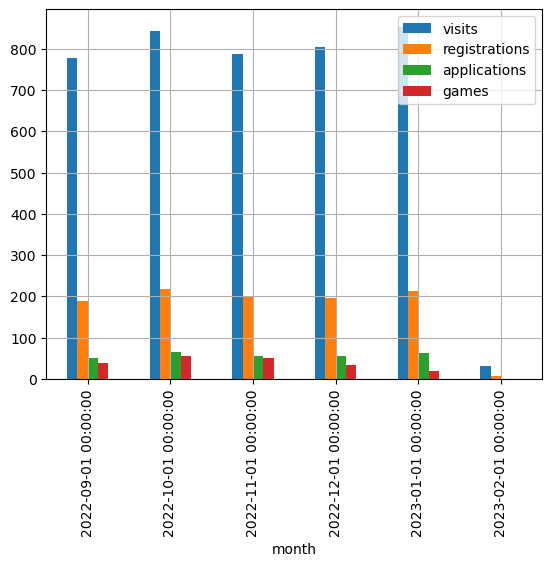

In [14]:
data[['month', 'visits', 'registrations', 'applications', 'games']].plot(x='month', kind='bar', grid=True)

<AxesSubplot:xlabel='week'>

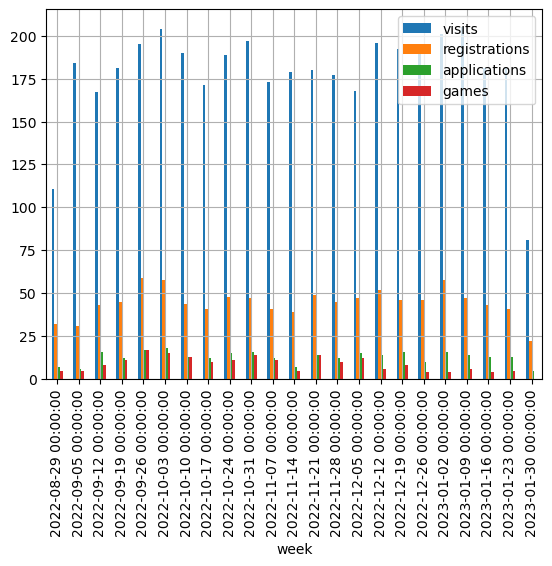

In [105]:
data_w[['week', 'visits', 'registrations', 'applications', 'games']].plot(x='week', kind='bar', grid=True)

2. Графики, рассматривающие долю людей на каждом из этапов от первоначального значения.

<AxesSubplot:xlabel='month'>

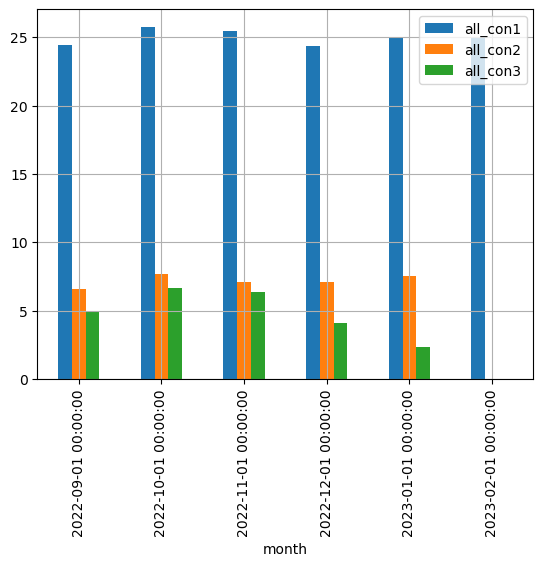

In [106]:
data[['month', 'all_con1', 'all_con2', 'all_con3']].plot(x='month', kind='bar', grid=True)

<AxesSubplot:xlabel='week'>

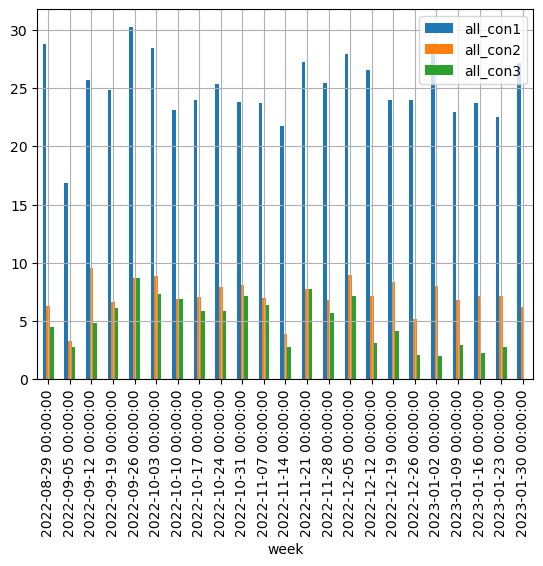

In [107]:
data_w[['week', 'all_con1', 'all_con2', 'all_con3']].plot(x='week', kind='bar', grid=True)

3. Графики конверсии

<AxesSubplot:xlabel='month'>

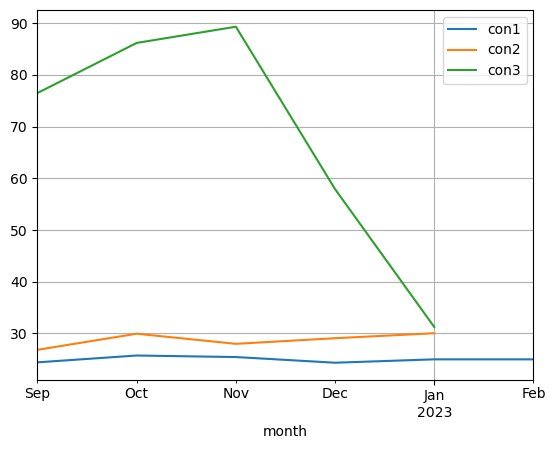

In [108]:
data[['month', 'con1', 'con2', 'con3']].plot(x='month', kind='line', grid=True)

<AxesSubplot:xlabel='week'>

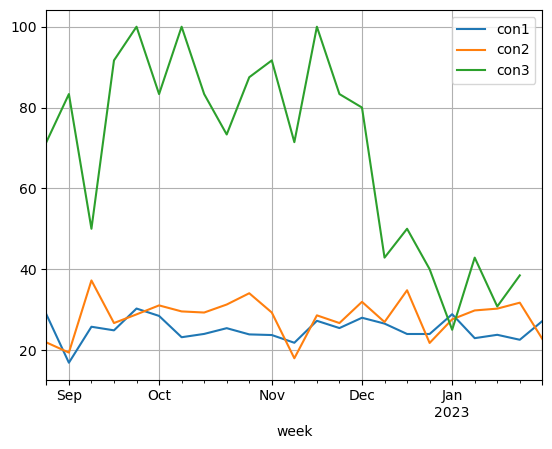

In [109]:
data_w[['week', 'con1', 'con2', 'con3']].plot(x='week', kind='line', grid=True)

##### --> Общие графики конверсии и количества людей (по месяцам и неделям) приведены ниже

#### Выводы:
Судя по графикам, аномальное падение клиентов наблюдается именно в процессе перехода клиентов из статуса "подавших заявку" до статуса "прошедших игру". Так как сами игры проводятся партнерами, то и выполнение критерия "состоявшаяся игра" зависит от работы этих партнеров. Соответственно, проблемы возникли именно со стороны партнеров, проводивших игры, так как в данном случае наш продукт представляет собой связь клиента и партнера по квестам. Как видно по графику, клиенты без проблем воспользовались сервисом Тинькофф квест и успешно подали заявки на различные игры, однако процент людей, прошедших игры по поданным заявкам значительно претерпело снижение, что, скорее всего, можно объяснить следующими причинами:

1. Излом графика выпадает на те месяца, которые относятся к "зимнему сезону" - возможно игры являются сезонным мероприятием, и конкретно зимой, они не удовлетворяют сезонные потребности людей, подавших заявки на участие в эти игры (примером может быть тот факт, что игра происходит на улице, из-за чего участникам некомфортно пребывать на улице в эти месяца и они, хоть и подали заявку, отказываются участвовать в квесте)
2. Как можно заметить на графике конверсии (по месяцам), стремительное снижение числа людей, посетивших и прошедших игры, вероятно может относится к внешнему воздействию, такому как конкуренция организаций квестов. Например, одни из организаторов квестов, которые не являются нашими партнерами, создали/организовали такие квести, провели такой маркетинг, который переманил большую часть наших клиентов, подавших заявку на участие в квестах партнеров через сервис Тинькофф квест. Так как переманившиеся клиенты скорее всего не пользовались нашим сервисом и прошли игры в сторонних организациях, в базе данных они не получают статуст "прошедших игру" и мы на выходе получили такие показатели.
3. Еще один вариант касается, вероятно, работе самих партнеров, а именно, например, технических работ по реконструкции квестов, перерывов в обслуживании и др. Технические причины могут быть самые разные, но общая суть сводится к тому, что клиент, подавший заявку на участие в игре, не смог ее пройти, так как на зарегистрированное им в заявке время игры случайным образом могло выпасть на внезапные технические работы по устранению неполадок или других причин, воспрепятствовавшие пользование участниками квестов.

#### Предложения, точки роста продукта:

На основе приведенных выводов, можно выделить следующие точки роста для нашего продукта.
1. Маркетинг: в различные сезонные периоды усилить рекламные предложения, выделять подборки сезонных квестов, ввести эксклюзивные акции и спецпредложения на продукты партнеров с целью поддержания интереса к квестам в любое время.
2. Расширить количество партнеров, предложить выгодные условия сильным игрокам на рынке квестов, способствовать маркетингу партнеров с целью привлечения большего числа клиентов именно к партнерам нашего сервиса, чтобы люди, пожелавшие поиграть в какой нибудь квест, в первую очередь видели предложения именно нашего сервиса (за счет наличия в сервисе сильных и известных партнеров)
3. Усилить контроль качества партнеров. При заключении договоров с партнерами: проводить тестирование и вводить строгие критерии сотрудничества с нашим сервисом. Регулярно проверять качество работы партнеров и выделить в рекламе сервиса пункт о том, что все предложения, доступные клиентам, надлежат высокому качеству и партнеры являются профессионалами своей сферы (чтобы клиенты были уверены, что их участие в квестах надежно обеспечено).

#### Общие графики конверсии и количества людей

1. По месяцам

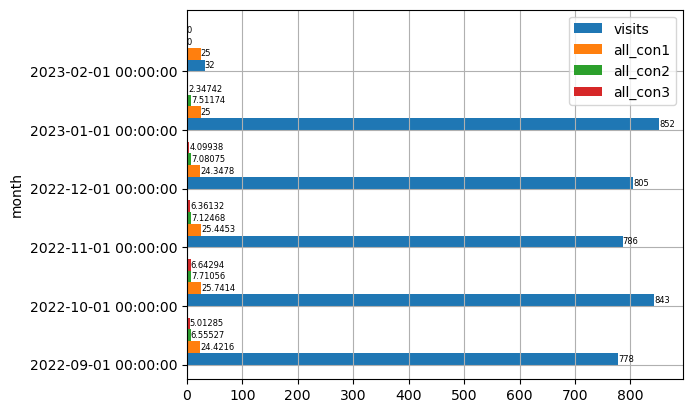

In [125]:
ax = data[['month', 'visits', 'all_con1', 'all_con2', 'all_con3']].plot(x='month', kind='barh', grid=True, align='edge', width = 0.8)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=6)

plt.show()

2. По неделям

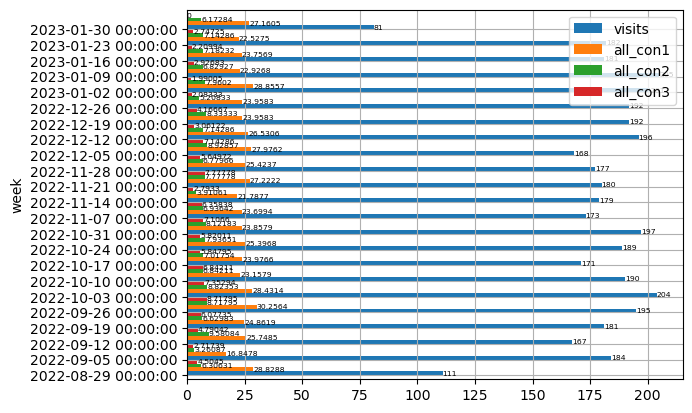

In [122]:
ax = data_w[['week', 'visits', 'all_con1', 'all_con2', 'all_con3']].plot(x='week', kind='barh', grid=True, align='edge', width = 1)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=5.5)

plt.show()